## Mount your Drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Libraries

In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


## Access of the dataset

In [ ]:
p = Path().cwd()
dataset_dir =  p / "/content/drive/MyDrive/Capstone-2/Dataset/Lung Cancer Dataset"

In [ ]:
images = [] # create an empty list
images_name = [] # create an empty list
labels = [] # create an empty list

In [ ]:
target_dict = {
    "Malignant cases": 'Malignant',
    "Bengin cases": 'Bengin',
    "Normal cases": 'Normal',
}

## Resize images

In [ ]:
for fldr in dataset_dir.iterdir():
    current_label = target_dict[fldr.name] # get the name of the current label
    # print(current_label)
    image_number = 0
    for img in os.listdir(fldr):
        images_name.append(img)

        img = load_img(os.path.join(fldr, img), color_mode='grayscale')
        img_array = img_to_array(img)

        img_array_resized = smart_resize(img_array, (512, 512)) # resize the image to 512 by 512
        img_array_reshaped = np.reshape(img_array_resized, (512, 512)) # reshape the image from (512, 512, 1) to (512, 512)

        images.append(img_array_reshaped)# add reshaped image to list of images
        labels.append(current_label)# add label for this image to the list of labels

        image_number += 1
    print(current_label, '-', image_number)

images = np.array(images) # convert the list of images to a NumPy array
labels = np.array(labels) # convert the list of labels to a NumPy array
print("DONE")

Bengin - 120
Normal - 416
Malignant - 561
DONE


Malignant case (188).jpg


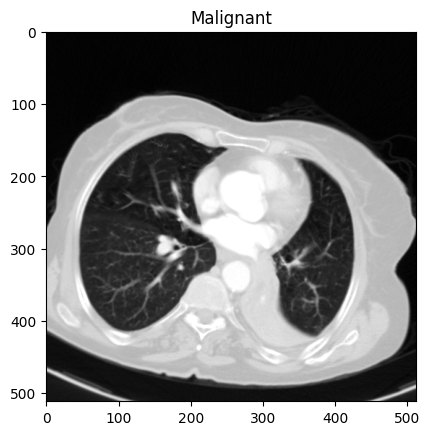

In [ ]:
# use plt.imshow() to view a few of the grayscale images
plt.imshow(images[651], cmap='gray')
plt.title(labels[651])
print(images_name[651])

In [ ]:
images[651]

array([[41., 41., 42., ..., 41., 41., 44.],
       [43., 42., 40., ..., 41., 43., 44.],
       [42., 43., 41., ..., 42., 43., 43.],
       ...,
       [55., 55., 56., ..., 61., 60., 59.],
       [55., 56., 57., ..., 59., 60., 60.],
       [57., 57., 57., ..., 54., 56., 56.]], dtype=float32)

In [ ]:
labels

array(['Bengin', 'Bengin', 'Bengin', ..., 'Malignant', 'Malignant',
       'Malignant'], dtype='<U9')

## Normalization of Images

In [ ]:
images = images / 255.0

In [ ]:
images[651]

array([[0.16078432, 0.16078432, 0.16470589, ..., 0.16078432, 0.16078432,
        0.17254902],
       [0.16862746, 0.16470589, 0.15686275, ..., 0.16078432, 0.16862746,
        0.17254902],
       [0.16470589, 0.16862746, 0.16078432, ..., 0.16470589, 0.16862746,
        0.16862746],
       ...,
       [0.21568628, 0.21568628, 0.21960784, ..., 0.23921569, 0.23529412,
        0.23137255],
       [0.21568628, 0.21960784, 0.22352941, ..., 0.23137255, 0.23529412,
        0.23529412],
       [0.22352941, 0.22352941, 0.22352941, ..., 0.21176471, 0.21960784,
        0.21960784]], dtype=float32)

## Lebel encoding

In [ ]:
label_dict = {'Malignant': 0, 'Bengin': 1, 'Normal': 2}
labels_encoded = np.array([label_dict[label] for label in labels])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

## Model building

In [ ]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 255, 255, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 126, 126, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 62, 62, 128)       0

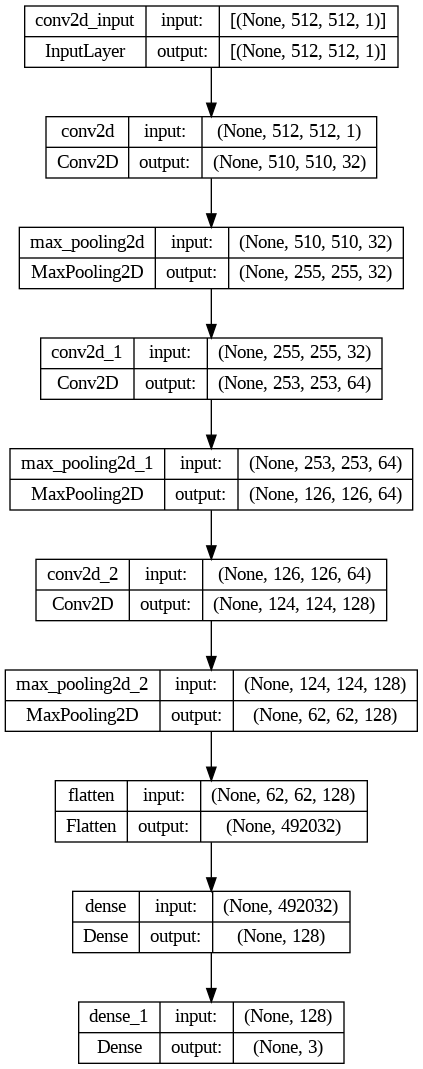

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
28/28 [==============================] - 23s 431ms/step - loss: 2.1938 - accuracy: 0.5211 - val_loss: 0.6935 - val_accuracy: 0.6818
Epoch 2/10
28/28 [==============================] - 7s 234ms/step - loss: 0.3361 - accuracy: 0.8803 - val_loss: 0.1295 - val_accuracy: 0.9773
Epoch 3/10
28/28 [==============================] - 7s 233ms/step - loss: 0.1283 - accuracy: 0.9532 - val_loss: 0.0945 - val_accuracy: 0.9636
Epoch 4/10
28/28 [==============================] - 7s 234ms/step - loss: 0.0305 - accuracy: 0.9943 - val_loss: 0.0520 - val_accuracy: 0.9727
Epoch 5/10
28/28 [==============================] - 6s 232ms/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.0373 - val_accuracy: 0.9818
Epoch 6/10
28/28 [==============================] - 6s 229ms/step - loss: 0.0502 - accuracy: 0.9886 - val_loss: 0.1621 - val_accuracy: 0.9409
Epoch 7/10
28/28 [==============================] - 7s 240ms/step - loss: 0.0335 - accuracy: 0.9943 - val_loss: 0.0814 - val_accuracy: 0.9773
Epoch

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_acc}')

7/7 [==============================] - 1s 66ms/step - loss: 0.0342 - accuracy: 0.9864

Test accuracy: 0.9863636493682861


In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1) #pick class with highest  probability


7/7 [==============================] - 1s 69ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred)*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       0.93      0.97      0.95        29
           2       0.99      0.97      0.98        79

    accuracy                           0.99       220
   macro avg       0.97      0.98      0.98       220
weighted avg       0.99      0.99      0.99       220

Accuracy of the Model: 98.6%


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# class_labels = ['Malignant', 'benign', 'Normal']

# cm = confusion_matrix(y_test, pred)

# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

# plt.xticks(ticks=[0.5, 1.5, 2.5], labels=class_labels)
# plt.yticks(ticks=[0.5, 1.5, 2.5], labels=class_labels)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")

# plt.title("Confusion Matrix")

# plt.show()